___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [2]:
pip install pandas-datareader

  Using cached pandas_datareader-0.10.0-py3-none-any.whl (109 kB)
Note: you may need to restart the kernel to use updated packages.


In [38]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [13]:
start = datetime.datetime(2010, 1, 29)
end = datetime.datetime.today()

In [14]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [17]:
JPM

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-28,40.040001,38.720001,39.680000,39.480000,65047400.0,28.578278
2010-01-29,39.849998,38.799999,39.650002,38.939999,53649000.0,28.187389
2010-02-01,39.930000,38.950001,39.099998,39.630001,37408200.0,28.686861
2010-02-02,40.680000,39.700001,39.799999,40.549999,45968500.0,29.352823
2010-02-03,41.099998,40.169998,40.580002,40.290001,37373300.0,29.164616
...,...,...,...,...,...,...
2022-07-11,114.230003,112.220001,113.550003,112.860001,7939500.0,112.860001
2022-07-12,115.180000,112.260002,112.580002,112.970001,11250900.0,112.970001
2022-07-13,112.480003,110.379997,111.750000,111.910004,12979900.0,111.910004


In [15]:
# Could also do this for a Panel Object
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'yahoo', start, end)

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [16]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [22]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis = 1, keys=tickers)
bank_stocks.head()

BAC                                                       C  \
             High    Low   Open  Close       Volume  Adj Close       High   
Date                                                                        
2010-01-28  15.59  15.01  15.40  15.37  232729500.0  13.057788  32.900002   
2010-01-29  15.55  15.09  15.49  15.18  175135300.0  12.896374  33.400002   
2010-02-01  15.44  15.13  15.26  15.42  159503300.0  13.100264  33.700001   
2010-02-02  15.68  15.31  15.45  15.60  171404800.0  13.253187  34.099998   
2010-02-03  15.80  15.52  15.57  15.53  130861600.0  13.193717  34.599998   

                                             ...         MS             \
                  Low       Open      Close  ...       Open      Close   
Date                                         ...                         
2010-01-28  32.000000  32.500000  32.400002  ...  28.200001  27.490000   
2010-01-29  32.700001  32.700001  33.200001  ...  27.830000  26.780001   
2010-02-01  33.099998  33.599998  33.400002  ...  26.950001  27.559999   
2010-02-02  33.200001  33.500000  34.099998  ...  27.600000  28.059999   
2010-02-03  33.700001  33.900002  33.700001  ...  28.160000  27.889999   

                                         WFC                                   \
                Volume  Adj Close       High        Low       Open      Close   
Date                                                                            
2010-01-28  25480700.0  21.974001  28.770000  27.719999  28.280001  28.450001   
2010-01-29  21166100.0  21.406467  29.170000  28.379999  28.440001  28.430000   
2010-02-01  19559900.0  22.029957  29.090000  28.510000  28.600000  28.930000   
2010-02-02  20992500.0  22.429628  29.129999  28.510000  28.959999  28.790001   
2010-02-03  18498800.0  22.293739  28.780001  27.980000  28.570000  28.139999   

                                   
                Volume  Adj Close  
Date                               
2010-01-28  62109300.0  20.573946  
2010-01-29  88783700.0  20.559475  
2010-02-01  45240000.0  20.921061  
2010-02-02  50306600.0  20.819817  
2010-02-03  44597600.0  20.385166  

[5 rows x 36 columns]

** Set the column name levels (this is filled out for you):**

In [23]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [24]:
bank_stocks.head()

Bank Ticker    BAC                                                       C  \
Stock Info    High    Low   Open  Close       Volume  Adj Close       High   
Date                                                                         
2010-01-28   15.59  15.01  15.40  15.37  232729500.0  13.057788  32.900002   
2010-01-29   15.55  15.09  15.49  15.18  175135300.0  12.896374  33.400002   
2010-02-01   15.44  15.13  15.26  15.42  159503300.0  13.100264  33.700001   
2010-02-02   15.68  15.31  15.45  15.60  171404800.0  13.253187  34.099998   
2010-02-03   15.80  15.52  15.57  15.53  130861600.0  13.193717  34.599998   

Bank Ticker                                   ...         MS             \
Stock Info         Low       Open      Close  ...       Open      Close   
Date                                          ...                         
2010-01-28   32.000000  32.500000  32.400002  ...  28.200001  27.490000   
2010-01-29   32.700001  32.700001  33.200001  ...  27.830000  26.780001   
2010-02-01   33.099998  33.599998  33.400002  ...  26.950001  27.559999   
2010-02-02   33.200001  33.500000  34.099998  ...  27.600000  28.059999   
2010-02-03   33.700001  33.900002  33.700001  ...  28.160000  27.889999   

Bank Ticker                               WFC                        \
Stock Info       Volume  Adj Close       High        Low       Open   
Date                                                                  
2010-01-28   25480700.0  21.974001  28.770000  27.719999  28.280001   
2010-01-29   21166100.0  21.406467  29.170000  28.379999  28.440001   
2010-02-01   19559900.0  22.029957  29.090000  28.510000  28.600000   
2010-02-02   20992500.0  22.429628  29.129999  28.510000  28.959999   
2010-02-03   18498800.0  22.293739  28.780001  27.980000  28.570000   

Bank Ticker                                    
Stock Info       Close      Volume  Adj Close  
Date                                           
2010-01-28   28.450001  62109300.0  20.573946  
2010-01-29   28.430000  88783700.0  20.559475  
2010-02-01   28.930000  45240000.0  20.921061  
2010-02-02   28.790001  50306600.0  20.819817  
2010-02-03   28.139999  44597600.0  20.385166  

[5 rows x 36 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [26]:
bank_stocks[bank_stocks['BAC']['Close'] == bank_stocks['BAC']['Close'].max()]

Bank Ticker    BAC                                                          \
Stock Info    High        Low       Open      Close      Volume  Adj Close   
Date                                                                         
2022-02-08   50.02  48.939999  49.150002  49.380001  49560500.0  48.858326   

Bank Ticker          C                                   ...          MS  \
Stock Info        High        Low       Open      Close  ...        Open   
Date                                                     ...               
2022-02-08   67.970001  66.599998  67.059998  67.120003  ...  105.970001   

Bank Ticker                                      WFC                          \
Stock Info        Close     Volume  Adj Close   High        Low  Open  Close   
Date                                                                           
2022-02-08   106.349998  9249000.0  105.44445  58.98  57.799999  58.0  58.75   

Bank Ticker                         
Stock Info       Volume  Adj Close  
Date                                
2022-02-08   39099600.0  58.430569  

[1 rows x 36 columns]

In [67]:
#for tick in tickers:
    #print(tick, bank_stocks[tick]['Close'].max())
bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').max()

Bank Ticker
BAC     49.380001
C       81.910004
GS     423.850006
JPM    171.779999
MS     108.730003
WFC     65.930000
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [34]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [35]:
for tick in tickers:
    returns[tick + 'Return'] = bank_stocks[tick]['Close'].pct_change()

In [36]:
returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2010-01-28,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-29,-0.012362,0.024691,-0.029813,-0.013678,-0.025828,-0.000703
2010-02-01,0.015810,0.006024,0.029653,0.017720,0.029126,0.017587
2010-02-02,0.011673,0.020958,0.024881,0.023215,0.018142,-0.004839
2010-02-03,-0.004487,-0.011730,0.001848,-0.006412,-0.006058,-0.022577


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

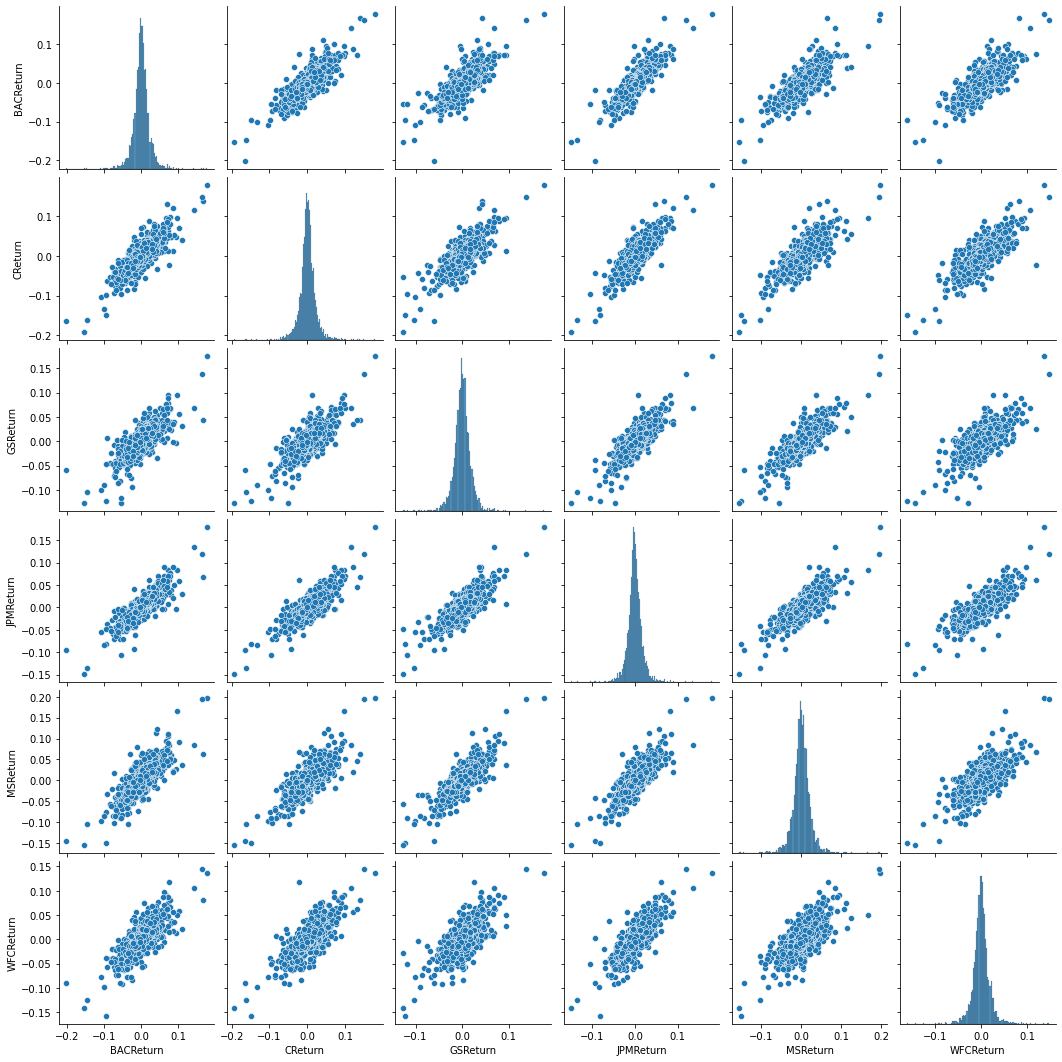

In [39]:
sns.pairplot(returns[1:])

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [41]:
returns.idxmin()

BACReturn   2011-08-08
CReturn     2020-03-16
GSReturn    2010-04-16
JPMReturn   2020-03-16
MSReturn    2020-03-16
WFCReturn   2020-03-12
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [42]:
returns.idxmax()

BACReturn   2020-03-13
CReturn     2020-03-13
GSReturn    2020-03-13
JPMReturn   2020-03-13
MSReturn    2020-03-13
WFCReturn   2020-03-24
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [43]:
returns.std()

BACReturn    0.021971
CReturn      0.022186
GSReturn     0.018392
JPMReturn    0.017978
MSReturn     0.022134
WFCReturn    0.019056
dtype: float64

In [50]:
returns.loc['2015-01-01':'2015-12-31'].std()

BACReturn    0.016163
CReturn      0.015289
GSReturn     0.014046
JPMReturn    0.014017
MSReturn     0.016249
WFCReturn    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


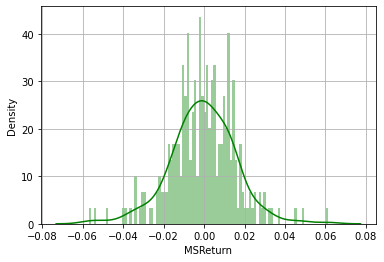

In [57]:
import matplotlib.pyplot as plt
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MSReturn'], color='green', bins=100)
plt.grid()

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

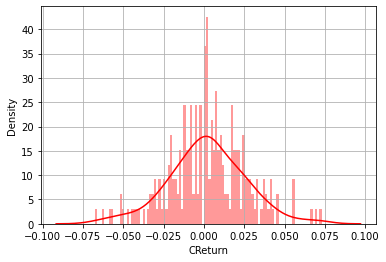

In [59]:
sns.distplot(returns.loc['2010-01-01':'2010-12-31']['CReturn'], color = 'red', bins = 100)
plt.grid()

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [61]:
pip install cufflinks

  Using cached cufflinks-0.17.3.tar.gz (81 kB)
  Using cached colorlover-0.3.0-py3-none-any.whl (8.9 kB)
Note: you may need to restart the kernel to use updated packages.
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68734 sha256=9618ee13444351aaa59b0fe424a5db0e5d3fe5f2e8f74d22d66733d78d859f08
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\29\b4\f8\2fd2206eeeba6ccad8167e4e8894b8c4ec27bf1342037fd136
Successfully built cufflinks


In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

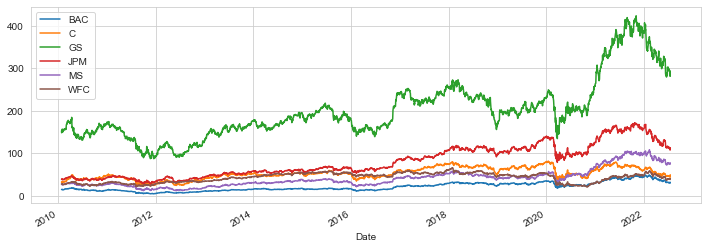

In [64]:
for tick in tickers :
    bank_stocks[tick]['Close'].plot(figsize = (12, 4), label = tick)
plt.legend()

<AxesSubplot:xlabel='Date'>

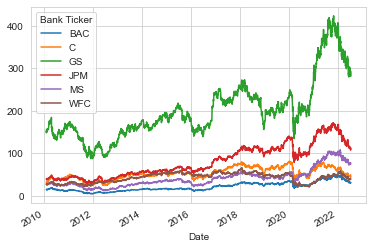

In [65]:
bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').plot()

In [68]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

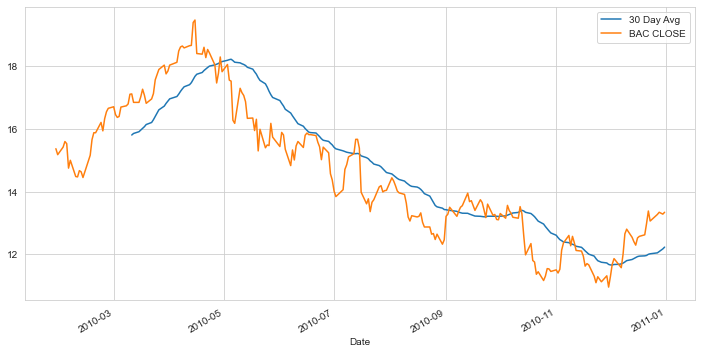

In [71]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2010-01-01':'2011-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2010-01-01':'2011-01-01'].plot(label='BAC CLOSE')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

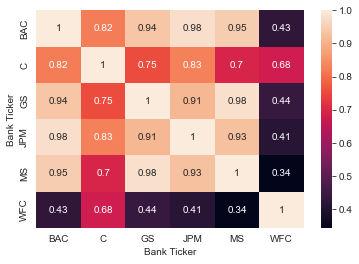

In [74]:
sns.heatmap(bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').corr(), annot = True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

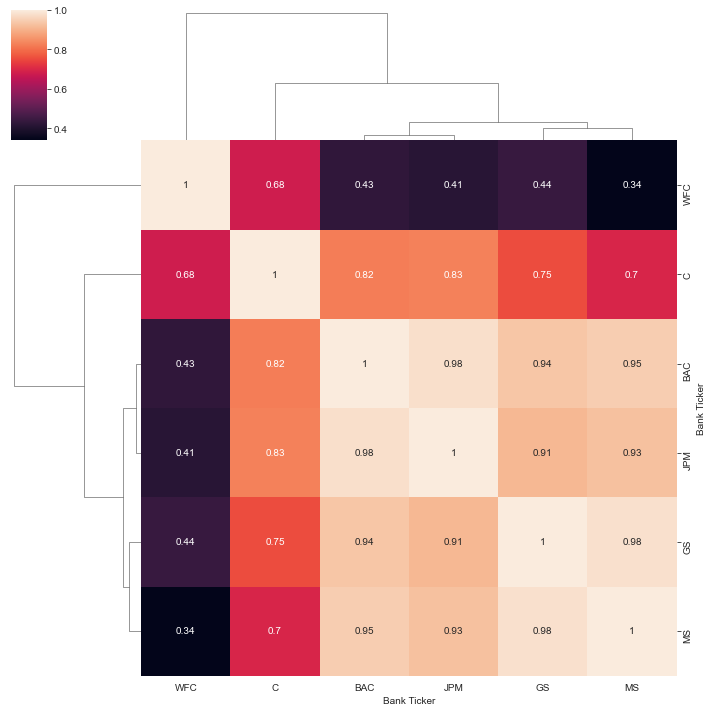

In [75]:
sns.clustermap(bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').corr(), annot = True)

In [76]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [77]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind = 'candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [80]:
MS['Close'].loc['2015-01-01':'2015-12-31'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [83]:
BAC['Close'].loc['2015-01-01':'2015-12-31'].ta_plot(study='boll')

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.